# Brain Tumor Classification Using Support Vector Machine (SVM)

![alt text](brain.jpg)

### Project Objective:
* The primary goal of the project is to develop a model that can accurately classify brain MRI images into distinct categories: glioma, meningioma, pituitary tumor, and no tumor. This classification aids in early detection, diagnosis, and treatment planning for patients with brain tumors.


### Importance of this project:
* **Early Detection**: Timely identification of brain tumors can lead to better treatment outcomes and improved patient survival rates.
* **Reducing Diagnostic Errors**: Automated classification systems can help reduce human error in diagnosing brain tumors by providing objective assessments based on learned patterns from a large dataset.
* **Improving Treatment**: Accurate classification can help in selecting the most appropriate treatment plan, which can vary significantly based on tumor type and grade.

### About The Brain Tumor Dataset
**1. What is a Brain Tumor?**
A brain tumor refers to a mass of abnormal cells that grow in the brain. Due to the rigid structure of the skull, any growth within this confined space can lead to increased pressure, potentially causing brain damage and posing life-threatening risks. Brain tumors can be categorized as:
* Malignant (Cancerous): These tumors are aggressive and can invade nearby tissues.
* Benign (Non-Cancerous): Although not cancerous, they can still cause problems by pressing against critical brain structures.


**2. Importance of Early Detection and Classification**
The early detection and classification of brain tumors are crucial in the medical field, significantly impacting treatment decisions and patient outcomes. Accurately identifying the type and grade of a tumor enables healthcare providers to select the most effective treatment methods, potentially saving lives.

**3. Image Preprocessing**
* Variable Image Sizes: Images in this dataset come in various sizes. To improve model accuracy, resizing and standardizing images is essential.
* Preprocessing Steps: Prior to training the model, it is recommended to preprocess the images to remove any extraneous margins and resize them to a consistent dimension suitable for model input.

### Methodologies



![alt text](Proposed-block-diagram-of-brain-tumor-classification-system.png)

* **Variable Image Sizes:**
   * The images in the dataset come in various dimensions. Standardizing these sizes is crucial to ensure uniform input for the SVM model, which requires fixed-size feature vectors.

* **Preprocessing Steps:**
    * Image Loading: Read images from the training and testing folders.
    * Remove Extraneous Margins: Crop any unnecessary borders or margins around the MRI scans to focus on the tumor area.
    * Resizing: Resize all images to a consistent dimension (e.g., 128x128 or 256x256 pixels) to standardize input across the dataset.
    * Normalization: Scale pixel values to the range [0, 1] or normalize to zero mean and unit variance to improve model performance.
    * Data Augmentation (Optional): Enhance the training dataset by applying transformations such as rotation, flipping, or zooming to increase diversity and reduce overfitting.

* **Feature Representation:**
    * Convert the preprocessed images into a suitable feature representation. Common approaches include:
    * Histogram of Oriented Gradients (HOG): Captures the structure and edge information in the images, which is crucial for identifying features relevant to brain tumors.
    * Flattening: Convert each image into a one-dimensional array (if using raw pixel values) to prepare it for input into the SVM model.

* **Kernel Selection:**
    * Choose the appropriate kernel for the SVM model based on the data characteristics:
        * Linear Kernel: If the data is likely to be linearly separable.
        * RBF (Radial Basis Function) Kernel: For non-linear data, which is often the case in complex image data.

    * Regularization: Implement soft-margin SVM to accommodate some misclassifications and manage noisy data.

* **Training the Model**:
    * Split the processed training dataset into features (X) and labels (y).
    * Fit the SVM model to the training data using cross-validation to tune hyperparameters (like C and gamma for the RBF kernel) for optimal performance.


* **Model Evaluation**
    * After training, evaluate the SVM model using the testing dataset:
        * Predictions: Use the trained model to predict classes for the test images.
        * Performance Metrics: Calculate performance metrics such as:
            * Accuracy: The percentage of correct predictions out of total predictions.
            * Precision: The ratio of true positive predictions to the total predicted positives.
            * Recall (Sensitivity): The ratio of true positive predictions to the actual positives.
            * F1-Score: The harmonic mean of precision and recall, providing a balance between the two metrics.
        * Confusion Matrix: Visualize the classification results to understand the distribution of correct and incorrect predictions among classes.

## Import Libraries

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Load The Data

load the brain tumor dataset from the kaggle
* The dataset consists of 7,022 images of human brain MRIs classified into four categories: glioma, meningioma, no tumor, and pituitary tumor.
* The dataset is split into:
    * Training Folder: 5,712 images for training the model.
    * Testing Folder: 1,311 images for evaluating model performance.

You can Download this from dataset [Link](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data)


In [3]:

train_dir = 'D:/Ml2/Dataset/Training'  
test_dir = 'D:/Ml2/Dataset/Testing'     



## Variable Image Sizes:

The images in the dataset come in various dimensions. Standardizing these sizes is crucial to ensure uniform input for the SVM model, which requires fixed-size feature vectors.
Let's take height and width as 180

In [4]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

## Image Processing

**Image Loading:** Read images from the training and testing folders.

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                               image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               batch_size=BATCH_SIZE)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               batch_size=BATCH_SIZE)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


#### Display ClassNames Of Training and Testing Dataset

In [6]:
class_names = train_ds.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

## Display Images

In [7]:
def show_images(dataset, title):
  plt.figure(figsize = (6,6))
  for images, labels in dataset.take(1):
    for i in range(9):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      plt.title(class_names[labels[i]])
      plt.axis("off")
  plt.suptitle(title)
  plt.show()

#### Diplay Training Dataset

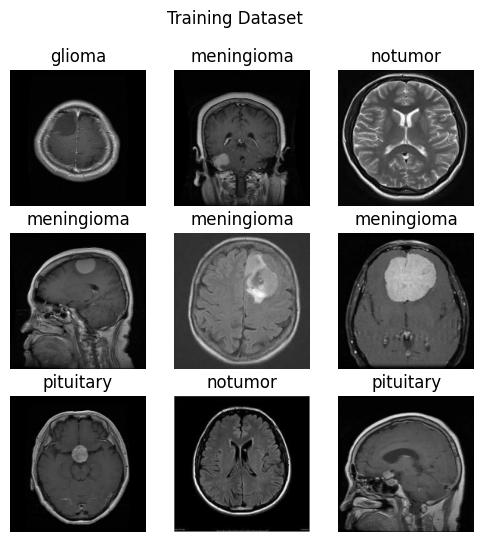

In [8]:
import matplotlib.pyplot as plt
show_images(train_ds, "Training Dataset")

#### Display Testing Dataset

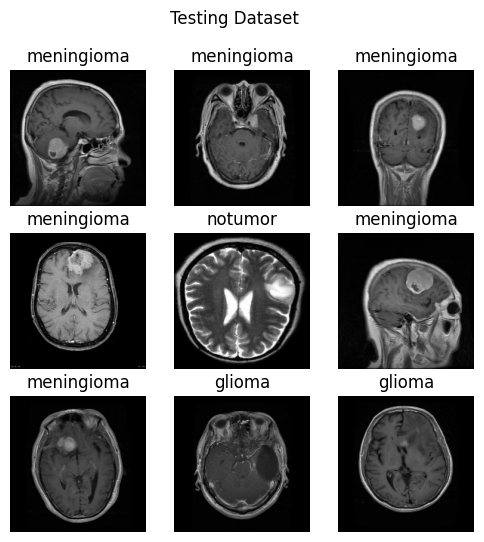

In [9]:
show_images(test_ds, 'Testing Dataset')

**Resizing:** Resize all images to a consistent dimension (e.g., 128x128 or 256x256 pixels) to standardize input across the dataset.

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical')

Found 5712 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical')

Found 1311 images belonging to 4 classes.


## Feature Extraction

Histogram of Oriented Gradients (HOG) features are extracted from the preprocessed images. HOG captures the edge and shape information crucial for identifying tumors.

In [29]:

def extract_hog_features(image):
    # Ensure the image is in the correct format
    image = (image * 255).astype(np.uint8)  
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute HOG features
    features = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                   orientations=9, block_norm='L2-Hys', visualize=False)
    return features


# Prepare the data for feature extraction
def prepare_data(dataset):
    features = []
    labels = []

    for images, lbl in dataset:
        for img, label in zip(images, lbl):
            img = img.numpy().astype('uint8') 
            # Extract HOG features
            feature = extract_hog_features(img)
            features.append(feature)
            labels.append(label.numpy())  

    return np.array(features), np.array(labels)


In [14]:
# Extract features from the training dataset
X_train, y_train = prepare_data(train_ds)


X_test, y_test = prepare_data(test_ds)

## Model Selection

A Support Vector Machine (SVM) with an RBF kernel is chosen due to the non-linear nature of the data. The RBF kernel is adept at handling complex relationships within the dataset.

**Why SVM?**

Support Vector Machine (SVM) is a powerful supervised machine learning algorithm used primarily for classification tasks, although it can also be applied to regression problems. Here’s a detailed explanation of SVM, its types of kernels, and why the Radial Basis Function (RBF) kernel is often preferred.

**What is SVM?**

Support Vector Machine (SVM) is a classification algorithm that finds the optimal hyperplane to separate data points of different classes in a high-dimensional space. The main concepts include:
* Hyperplane: A hyperplane is a decision boundary that separates different classes in the feature space. In two dimensions, this is a line; in three dimensions, it is a plane; and in higher dimensions, it is referred to as a hyperplane.

* Support Vectors: These are the data points that are closest to the hyperplane. They are critical in defining the position and orientation of the hyperplane. The SVM algorithm aims to maximize the margin (distance) between these support vectors and the hyperplane.

* Margin: The margin is the distance between the hyperplane and the nearest data point from either class. A larger margin is preferred as it leads to better generalization on unseen data.

**Why Use SVM?**

* Effective in High Dimensions: SVMs are particularly effective when the number of features is greater than the number of samples, making them suitable for high-dimensional datasets like images.

* Robust to Overfitting: With appropriate regularization, SVMs are less prone to overfitting, especially in high-dimensional spaces.

* Versatile: SVMs can handle both linear and non-linear classification problems through the use of different kernels.

* Clear Margin of Separation: SVMs find the hyperplane that maximizes the margin between classes, leading to robust classification.



**Types of Kernels in SVM**
Kernels are functions that transform data into a higher-dimensional space to make it easier to separate classes. Different kernel functions can capture different data characteristics. The most common kernel types include:

* **Linear Kernel:**


![alt text](<Screenshot 2024-10-24 174852.png>)


* **Polynomial Kernel:**


![alt text](<Screenshot 2024-10-24 175032.png>)


* **Radial Basis Function (RBF) Kernel:**

![alt text](<Screenshot 2024-10-24 175214.png>)


* **Sigmoid Kernel:**

![alt text](<Screenshot 2024-10-24 175221.png>)

#### Why Use RBF Kernel in This Project?
The choice of the RBF kernel for your brain tumor classification project can be justified for several reasons:

**Non-linearity:**

* Complex Patterns: Brain MRI images often contain complex patterns that are not linearly separable. The RBF kernel can model these non-linear relationships effectively, allowing the SVM to find more complex decision boundaries.


**Locality:**

* Distance Sensitivity: The RBF kernel is sensitive to the local structure of the data. It can create a decision boundary that closely fits the distribution of the training data, which is crucial for accurately classifying brain tumors based on subtle visual features.

**Flexibility:**

* Adjustable Parameters: The RBF kernel has a parameter (gamma) that can be tuned to control the influence of individual training examples. This flexibility can help in adapting the model to the specific characteristics of the dataset.

**Common Practice in Image Classification:**

* Widely Used: RBF kernels are commonly used in image classification tasks because they often outperform linear kernels, especially in cases where the input data is high-dimensional and complex, like images.

## Train The Model
Svm Architecture

![alt text](svm.png)

Train the SVM model with RBF Kernel


In [15]:

# Train SVM model with RBF kernel
def train_svm_rbf(X_train, y_train):
    print("Training SVM with RBF Kernel...")
    rbf_svm = svm.SVC(kernel='rbf', C=1.0, gamma='scale')  
    rbf_svm.fit(X_train, y_train)
    return rbf_svm


In [16]:
# Train the model
rbf_svm = train_svm_rbf(X_train, y_train)


Training SVM with RBF Kernel...


## Evaluate The Model

In [17]:


# Evaluate the RBF model on the test data
y_pred = rbf_svm.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.98%


In [18]:
# Precision, Recall, F1-Score
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=train_ds.class_names))


Classification Report:

              precision    recall  f1-score   support

      glioma       0.94      0.85      0.89       300
  meningioma       0.85      0.86      0.86       306
     notumor       0.96      1.00      0.98       405
   pituitary       0.95      0.98      0.97       300

    accuracy                           0.93      1311
   macro avg       0.93      0.92      0.92      1311
weighted avg       0.93      0.93      0.93      1311




Confusion Matrix:



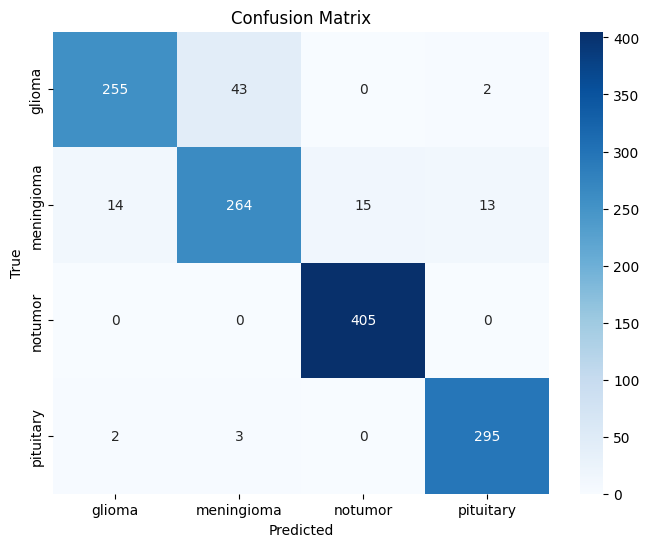

In [19]:
# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_ds.class_names, yticklabels=train_ds.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Save the Model

In [20]:
import joblib



# Save the model to a file
joblib.dump(rbf_svm, 'rbf_svm_model.pkl')
print("Model saved to rbf_svm_model.pkl")


Model saved to rbf_svm_model.pkl


## Making Predictions on Custom MRI Images

In [23]:
# Load the model from the file
loaded_model = joblib.load('rbf_svm_model.pkl')

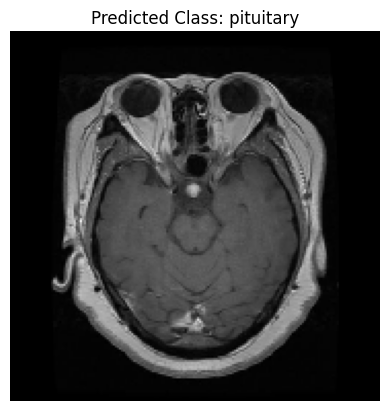

Predicted class: pituitary


In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

def predict_image(image_path):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    image_array = np.array(image) / 255.0  
    features = extract_hog_features(image_array) 
    features = features.reshape(1, -1)  

    # Make prediction
    prediction = loaded_model.predict(features)
    predicted_class = class_names[prediction[0]]  

    # Display the image with the predicted class
    plt.imshow(image)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class

custom_image_path = 'D:/Ml2/Dataset/Testing/pituitary/Te-pi_0010.jpg' 
prediction_result = predict_image(custom_image_path)
print(f'Predicted class: {prediction_result}')
